In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles, make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Define Classifiers

Here we will define all the classifiers that we're interested in evaluating in this exercise, as well their corresponding parameters.

In [145]:
classifiers = {
    'Naive Bayes': GaussianNB(),
    'LogisticRegression': LogisticRegression(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'SVC': SVC(kernel="rbf", C=1, random_state=42),
    'DecisionTree': DecisionTreeClassifier(max_depth=4, random_state=42),
    'KNN (k=1)': KNeighborsClassifier(n_neighbors=1)
}

## Define Datasets

Here we will define the various datasets using make_blobs and make_circles from sklearn. 

In [146]:
datasets = {
    'Well-separated Blobs': make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.5),
    'Well-seperated Circles': make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42),
    'Circles Dataset': make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=42),
    'Complex Circles Dataset': make_circles(n_samples=300, noise=0.1, factor=0.8, random_state=42)
}

## Iterate over Datasets and Classifiers and Plotting Decision Boundary

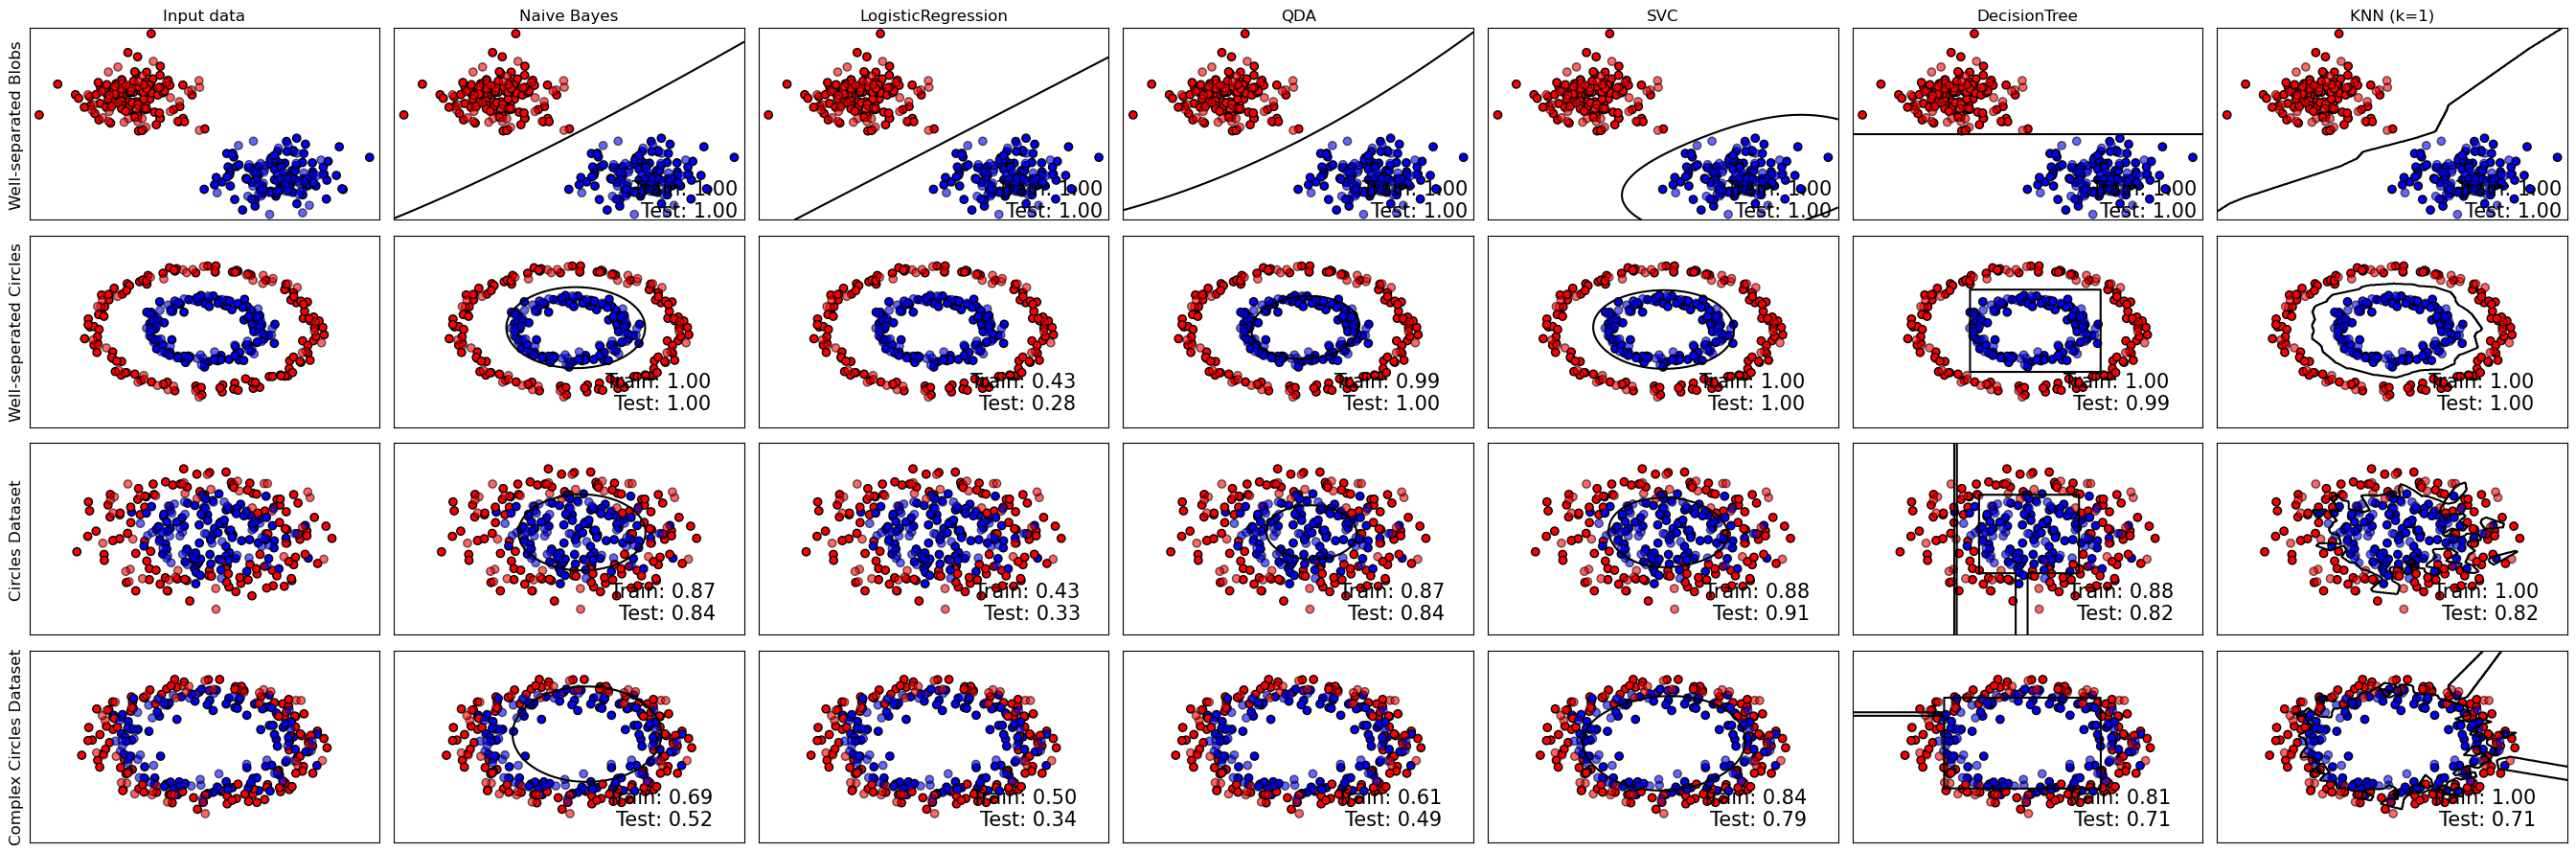

In [147]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
figure = plt.figure(figsize=(27, 9))
i = 1
classification_reports = {}

for ds_name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    classification_reports[ds_name] = {}

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_name == 'Well-separated Blobs':
        ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_ylabel(ds_name, size='large')
    i += 1

    for clf_name, clf in classifiers.items():
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        pipeline = make_pipeline(StandardScaler(), clf)
        pipeline.fit(X_train, y_train)
        train_score = pipeline.score(X_train, y_train) # Training Score
        test_score = pipeline.score(X_test, y_test) # Testing Score
        classification_reports[ds_name][clf_name] = classification_report(y_test, pipeline.predict(X_test), output_dict=True)

        # Create mesh grid
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
        if hasattr(clf, "decision_function"):
            Z = pipeline.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            # Use the second class's probability as a decision function if predict_proba is available
            Z = pipeline.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        Z = Z.reshape(xx.shape)

        # Plot decision boundary
        ax.contour(xx, yy, Z, levels=[0.5], cmap="Greys_r")  # Adjust level for binary classifiers
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_name == 'Well-separated Blobs':
            ax.set_title(clf_name)
        ax.text(x_max - 0.3, y_min + 0.3, f'Train: {train_score:.2f}\nTest: {test_score:.2f}', size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()


## Classification Report 

In [148]:
for ds_name, clf_reports in classification_reports.items():
    print(f"Dataset: {ds_name}\n")
    for clf_name, report in clf_reports.items():
        print(f"Classifier: {clf_name}")
        report_df = pd.DataFrame(report).transpose()
        print(report_df)
    print("\n")  

Dataset: Well-separated Blobs

Classifier: Naive Bayes
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     42.0
1                   1.0     1.0       1.0     48.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     90.0
weighted avg        1.0     1.0       1.0     90.0
Classifier: LogisticRegression
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     42.0
1                   1.0     1.0       1.0     48.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     90.0
weighted avg        1.0     1.0       1.0     90.0
Classifier: QDA
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     42.0
1                   1.0     1.0       1.0     48.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     90.0
weighted avg        1.0     1.0

## Analysis

In the first dataset "Well-separated Blob" all classifiers performed very well on the training and testing sets, which is expected. 
In the second dataset "Well-seperated Circles", logistic regression classifier did very poorly, becasue decision boundary is not linear. All other classifiers, including QDA performed very well on the training and test sets. 
Same observation for the third dataset. 
In the fourth dataset "Complex Circles Dataset", logistic regression, QDA, and Naive Bayes do very poorly on the training and testing sets. SVC, Decision Tree, and KNN (k=1) do very well, with SVC performing best. With KNN, we are most likely overfiting because of small k